In [118]:
import re
import requests
import datetime
from datetime import timedelta

In [119]:
#Audio file data
#Here we extracted audio read me files of five different textbooks belonging to three different categories
audio_txt_lst=["https://www.gutenberg.org/files/26214/26214-readme.txt",
"https://www.gutenberg.org/files/26267/26267-readme.txt",
"https://www.gutenberg.org/files/26245/26245-readme.txt",
"https://www.gutenberg.org/files/23706/23706-readme.txt",
"https://www.gutenberg.org/files/22446/22446-readme.txt",
]

In [120]:
Audio_data_dict={}
Audio_data_dict.clear()
Audio_data_dict

{}

In [153]:
#Here we are trying to get time from audio files in minutes
for url in audio_txt_lst:
  page = requests.get(url)
  Text_data=re.sub(r'[!@#$]', '',page.text)
  text_data=re.sub(r'\r\n', ' ', Text_data)
  text_data = re.sub(' +', ' ', text_data)
  Title_Start=text_data.find("Title")
  if "Author:" in re.sub(r'[..]','',text_data[Title_Start:Title_Start+50])[7:]:
    Title_End= text_data.find("Author:")

    Title_Name=re.sub(r'[..]','',text_data[Title_Start:Title_End])[7:]
    Title_Name=Title_Name.lstrip(' ')
    Title_Name=Title_Name.rstrip(' ')
  else:
    Title_End= text_data.find("Subtitle:")
    Title_Name=re.sub(r'[..]','',text_data[Title_Start:Title_End])[7:]
    Title_Name=Title_Name.lstrip(' ')
    Title_Name=Title_Name.rstrip(' ')
  Time_start=text_data.find('Contents')
  Time_stop=text_data.find('Librivox Audio Recording Public Domain Certification')
  text_data[Time_start:Time_stop]
  matches = re.findall(r'\b\d{2}\:\d{2}\:\d{2}\b',text_data[Time_start:Time_stop] )
  timeList = matches
  sum_time = datetime.timedelta()
  for i in timeList:
      (h, m, s) = i.split(':')
      date_add = datetime.timedelta(hours=int(h), minutes=int(m), seconds=int(s))
      sum_time += date_add
  Time_Stamp = str(sum_time)
  delta = timedelta(hours=int(Time_Stamp.split(':')[0]), minutes=int(Time_Stamp.split(':')[1]), seconds=int(Time_Stamp.split(':')[2]))
  minutes = int(delta.total_seconds()/60)
  K=Title_Name
  if K.find(":") != -1:
    K=K.split(":",1)[0]
  elif K.find(";") != -1:
    K=K.split(";",1)[0]
  
  Title_Name = K
  Audio_data_dict[Title_Name.lower()]=minutes
  print(url,Title_Name)

https://www.gutenberg.org/files/26214/26214-readme.txt The Jesuit Missions
https://www.gutenberg.org/files/26267/26267-readme.txt The Romance of Rubber
https://www.gutenberg.org/files/26245/26245-readme.txt The History of the Peloponnesian War
https://www.gutenberg.org/files/23706/23706-readme.txt Greenmantle
https://www.gutenberg.org/files/22446/22446-readme.txt Alexander the Great


In [122]:
Audio_data_dict

{'the jesuit missions': 189,
 'the romance of rubber': 42,
 'the history of the peloponnesian war': 1257,
 'greenmantle': 549,
 'alexander the great': 357}

# wrapping content functions

1a. **Data collection and preprocessing**


In [123]:
def end_of_sentence_marker(character):
    # insert your code here
    return character in "!.?"

In [124]:
def end_of_sentence_marker(character):
    # insert your code here
    if re.match(r"[\!\.\?]", character):
      return True
    else:
      return False

In [125]:
def split_sentences(text):
    "Split a text string into a list of sentences."
    sentences = []
    start = 0
    for end, character in enumerate(text):
        if end_of_sentence_marker(character):
            sentence = text[start: end + 1]
            sentences.append(sentence)
            start = end + 2
    return sentences

In [126]:
import string
print(string.punctuation)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [127]:
def clean_text(input_text):
  output_string = ""
  for char in input_text:
    if char not in string.punctuation:
      output_string += char
  return output_string.lower()

In [128]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
def word_tokenizer(cleaned_sentence):
    word_list = re.split(r" ", cleaned_sentence)
    return word_list
def tokenize(text):
    """Transform TEXT into a list of sentences. Lowercase 
    each sentence and remove all punctuation. Finally split each
    sentence into a list of words."""
    clean_sentences = []
    sentences = split_sentences(text)
    for sent in sentences:
        clean_sent = clean_text(sent)
        word_list = word_tokenizer(clean_sent)
        clean_sentences += [word_list]
    return clean_sentences
# these tests should return True if your code is correct
#print(tokenize(Content))



# Text data
Here we are getting text read me files and changing it to other format

1b. **Store the associated times in minutes from the audiobook in a dictionary**

In [130]:

txt_lst=[
"https://www.gutenberg.org/cache/epub/4388/pg4388.txt",
"https://www.gutenberg.org/cache/epub/4759/pg4759.txt",
"https://www.gutenberg.org/cache/epub/559/pg559.txt",
"https://www.gutenberg.org/cache/epub/7142/pg7142.txt",
"https://www.gutenberg.org/cache/epub/30624/pg30624.txt"
]

In [131]:
Text_data_dict={}
Text_data_dict.clear()
Text_data_dict

{}

In [154]:
for url in txt_lst:
  page = requests.get(url)
  Text_data=re.sub(r'[!@#$]', '',page.text)
  text_data=re.sub(r'\r\n', ' ', Text_data)
  text_data = re.sub(' +', ' ', text_data)
  t=text_data[:150].split(", by")[0]
  t1=t.split("of")[1:]
  t2='of'.join(t1)
  Title_Name=t2.lstrip(" ")
  Title_Name=Title_Name.rstrip(" ")
  if len(Title_Name) == 0:
    t=text_data[:150].split(",")[1]
    t2=t
    Title_Name=t2.lstrip(" ")
    Title_Name=Title_Name.rstrip(" ")
  elif t.find("Project Gutenberg's")== 1:
    t=text_data[:150].split("Project Gutenberg's")[1]
    t2=t.split(",")[0]
    Title_Name=t2.lstrip(" ")
    Title_Name=Title_Name.rstrip(" ")
  
  print(Title_Name)


  Content=text_data[text_data.find("CHAPTER ") :text_data.find("End of Project Gutenberg's")]
  if len(Content) == 0:
    Content=text_data[text_data.find("CHAPTER "):text_data.find("END OF THE PROJECT GUTENBERG EBOOK")]

  
  Text_data_dict[Title_Name.lower().rstrip()]=[tokenize(Content.lower())]   

The Jesuit Missions
The Romance of Rubber
Greenmantle
The History of the Peloponnesian War
Alexander the Great


In [133]:
for k, v in Text_data_dict.items():
    print(k,len(v[0]))

the jesuit missions 1204
the romance of rubber 577
greenmantle 7032
the history of the peloponnesian war 5370
alexander the great 2950


In [134]:
Audio_data_dict

{'the jesuit missions': 189,
 'the romance of rubber': 42,
 'the history of the peloponnesian war': 1257,
 'greenmantle': 549,
 'alexander the great': 357}

In [155]:
# Here we are writing a function to obtain the count of words so through below function we can get number of words
def recursive_len(item):
    if type(item) == list:
        return sum(recursive_len(subitem) for subitem in item)
    else:
        return 1

In [136]:
Text_data_dict_copy=Text_data_dict

In [137]:
for k, v in Text_data_dict_copy.items():
    print(k,int(recursive_len(v[0])/130))

the jesuit missions 218
the romance of rubber 72
greenmantle 786
the history of the peloponnesian war 1597
alexander the great 427


In [138]:
Text_data_dict_Final={}
Text_data_dict_Final.clear()
Text_data_dict_Final

{}

In [156]:
# Here we are changing text data to WORDS PER MINUTE by using 130 words per minute condition
for a, b in Text_data_dict_copy.items():
  X=int(recursive_len(b[0])/130)
  Y=X
  if X > 500:
    Y=X-150
  Text_data_dict_Final[a] = int(Y)
  print(a,Y)

the jesuit missions 218
the romance of rubber 72
greenmantle 636
the history of the peloponnesian war 1447
alexander the great 427


In [140]:
Audio_data_dict

{'the jesuit missions': 189,
 'the romance of rubber': 42,
 'the history of the peloponnesian war': 1257,
 'greenmantle': 549,
 'alexander the great': 357}

**1c. Find the length in spoken time for each text.**

In [141]:
import pandas as pd

In [143]:
dataframe_1=pd.DataFrame(Text_data_dict_Final.items(), columns=['Text.Name', 'Expected.Length'])
dataframe_2=pd.DataFrame(Audio_data_dict.items(), columns=['Text.Name', 'Actual.Length'])

In [144]:
dataframe_1

,Text.Name,Expected.Length
0,the jesuit missions,218
1,the romance of rubber,72
2,greenmantle,636
3,the history of the peloponnesian war,1447
4,alexander the great,427


In [145]:
dataframe_2

,Text.Name,Actual.Length
0,the jesuit missions,189
1,the romance of rubber,42
2,the history of the peloponnesian war,1257
3,greenmantle,549
4,alexander the great,357


In [146]:
dataframe_3=pd.merge(dataframe_1, dataframe_2, on='Text.Name')

In [147]:
dataframe_3

,Text.Name,Expected.Length,Actual.Length
0,the jesuit missions,218,189
1,the romance of rubber,72,42
2,greenmantle,636,549
3,the history of the peloponnesian war,1447,1257
4,alexander the great,427,357


In [148]:
dataframe_3['Length.Difference'] = dataframe_3['Expected.Length']-dataframe_3['Actual.Length']

In [149]:
dataframe_3

,Text.Name,Expected.Length,Actual.Length,Length.Difference
0,the jesuit missions,218,189,29
1,the romance of rubber,72,42,30
2,greenmantle,636,549,87
3,the history of the peloponnesian war,1447,1257,190
4,alexander the great,427,357,70


**1e. Plot the results**

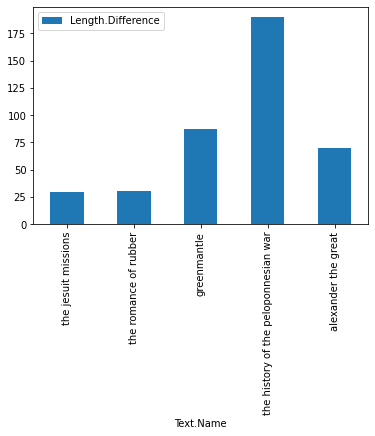

In [151]:
plot = dataframe_3.plot.bar(x = 'Text.Name', y = 'Length.Difference')